In [ ]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
pd.set_option('display.max_columns', None)
df = pd.read_csv("E:\AI_in_cybersecurity_NTI\grad_project\sampled_NF-CSE-CIC-IDS2018-v2.csv")
df

,IPV4_SRC_ADDR,L4_SRC_PORT,IPV4_DST_ADDR,L4_DST_PORT,PROTOCOL,L7_PROTO,IN_BYTES,IN_PKTS,OUT_BYTES,OUT_PKTS,TCP_FLAGS,CLIENT_TCP_FLAGS,SERVER_TCP_FLAGS,FLOW_DURATION_MILLISECONDS,DURATION_IN,DURATION_OUT,MIN_TTL,MAX_TTL,LONGEST_FLOW_PKT,SHORTEST_FLOW_PKT,MIN_IP_PKT_LEN,MAX_IP_PKT_LEN,SRC_TO_DST_SECOND_BYTES,DST_TO_SRC_SECOND_BYTES,RETRANSMITTED_IN_BYTES,RETRANSMITTED_IN_PKTS,RETRANSMITTED_OUT_BYTES,RETRANSMITTED_OUT_PKTS,SRC_TO_DST_AVG_THROUGHPUT,DST_TO_SRC_AVG_THROUGHPUT,NUM_PKTS_UP_TO_128_BYTES,NUM_PKTS_128_TO_256_BYTES,NUM_PKTS_256_TO_512_BYTES,NUM_PKTS_512_TO_1024_BYTES,NUM_PKTS_1024_TO_1514_BYTES,TCP_WIN_MAX_IN,TCP_WIN_MAX_OUT,ICMP_TYPE,ICMP_IPV4_TYPE,DNS_QUERY_ID,DNS_QUERY_TYPE,DNS_TTL_ANSWER,FTP_COMMAND_RET_CODE,Label,Attack,Attack_Category
0,172.31.65.84,53272,31.13.65.7,443,6,91.119,2330,32,34432,41,223,223,31,0,0,0,128,128,1450,40,40,1450,2330.0,34432.0,0,0,172,2,18640000,275456000,43,5,2,1,22,8192,28200,0,0,0,0,0,0,0,Benign,Benign
1,116.11.32.121,6753,172.31.67.34,3389,6,0.000,1476,8,1869,7,30,30,26,0,0,0,36,36,1213,40,40,1213,1476.0,1869.0,0,0,0,0,11808000,14952000,10,2,1,1,1,64240,64000,0,0,0,0,0,0,0,Benign,Benign
2,5.188.9.25,53238,172.31.64.86,3336,6,0.000,40,1,0,0,2,2,0,0,0,0,0,0,40,40,0,40,40.0,0.0,0,0,0,0,320000,0,1,0,0,0,0,1024,0,0,0,0,0,0,0,0,Benign,Benign
3,212.92.117.95,51202,172.31.67.120,3389,6,0.000,1476,8,1873,7,222,222,90,0,0,0,102,102,1213,40,40,1213,1476.0,1873.0,0,0,0,0,11808000,14984000,10,2,1,1,1,8192,64000,0,0,0,0,0,0,0,Benign,Benign
4,172.31.65.40,56305,172.31.0.2,53,17,0.000,58,1,262,1,0,0,0,0,0,0,0,0,262,58,58,262,58.0,262.0,0,0,0,0,464000,2096000,1,0,1,0,0,0,0,0,0,21640,1,60,0,0,Benign,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188933,18.218.115.60,63495,172.31.69.28,80,6,7.000,64335,206,194134,105,219,219,27,0,0,0,127,127,1976,40,40,1976,64335.0,194134.0,0,0,0,0,514680000,1553072000,109,0,51,50,0,8192,26883,0,0,0,0,0,0,1,Brute Force -XSS,Web Attacks
188934,18.218.115.60,51742,172.31.69.28,80,6,7.000,503,5,1147,5,219,219,27,4294936,30,30,127,127,975,40,40,975,503.0,1147.0,0,0,0,0,128000,296000,8,0,1,1,0,65535,26883,0,0,0,0,0,0,1,SQL Injection,Web Attacks
188935,18.218.115.60,53006,172.31.69.28,80,6,7.000,527,5,1147,5,219,219,27,4294911,55,55,127,127,975,40,40,975,527.0,1147.0,0,0,0,0,72000,160000,8,0,1,1,0,65535,26883,0,0,0,0,0,0,1,Brute Force -XSS,Web Attacks
188936,18.218.115.60,50252,172.31.69.28,80,6,7.000,522,5,1147,5,219,219,27,4294964,2,2,127,127,975,40,40,975,522.0,1147.0,0,0,0,0,1392000,3056000,8,0,1,1,0,65535,26883,0,0,0,0,0,0,1,Brute Force -Web,Web Attacks


# Target Insights

In [ ]:
df["Attack"].value_counts()

Benign                      166356
DDOS attack-HOIC             10796
DoS attacks-Hulk              4356
DDoS attacks-LOIC-HTTP        3090
Bot                           1431
Infilteration                 1164
SSH-Bruteforce                 953
DoS attacks-GoldenEye          272
FTP-BruteForce                 256
DoS attacks-SlowHTTPTest       123
DoS attacks-Slowloris           89
Brute Force -Web                25
DDOS attack-LOIC-UDP            17
Brute Force -XSS                 8
SQL Injection                    2
Name: Attack, dtype: int64

In [ ]:
attack_counts = df["Attack_Category"].value_counts()

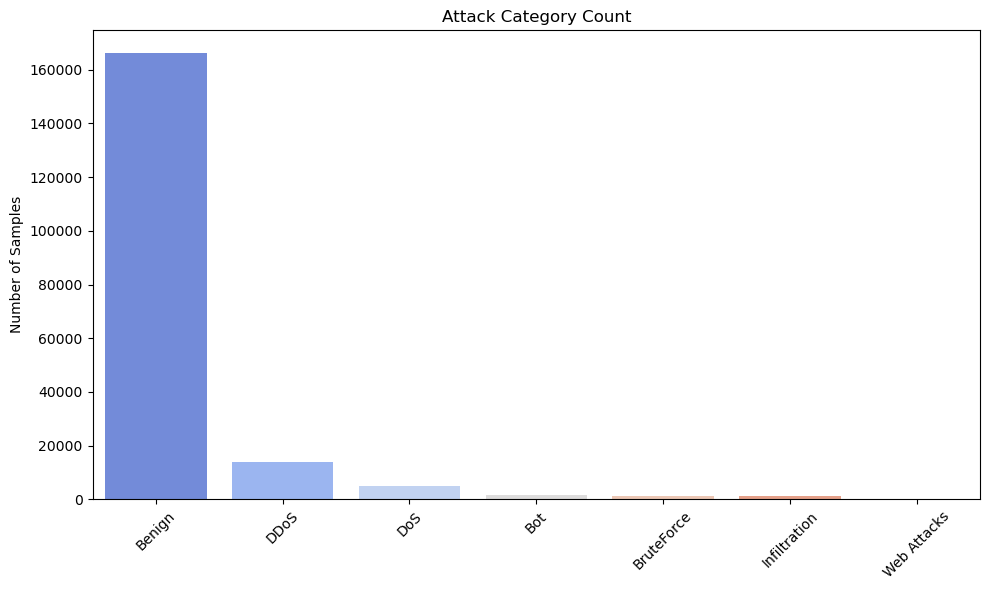

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x=attack_counts.index, y=attack_counts.values, palette='coolwarm')
plt.title('Attack Category Count')
plt.ylabel('Number of Samples')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

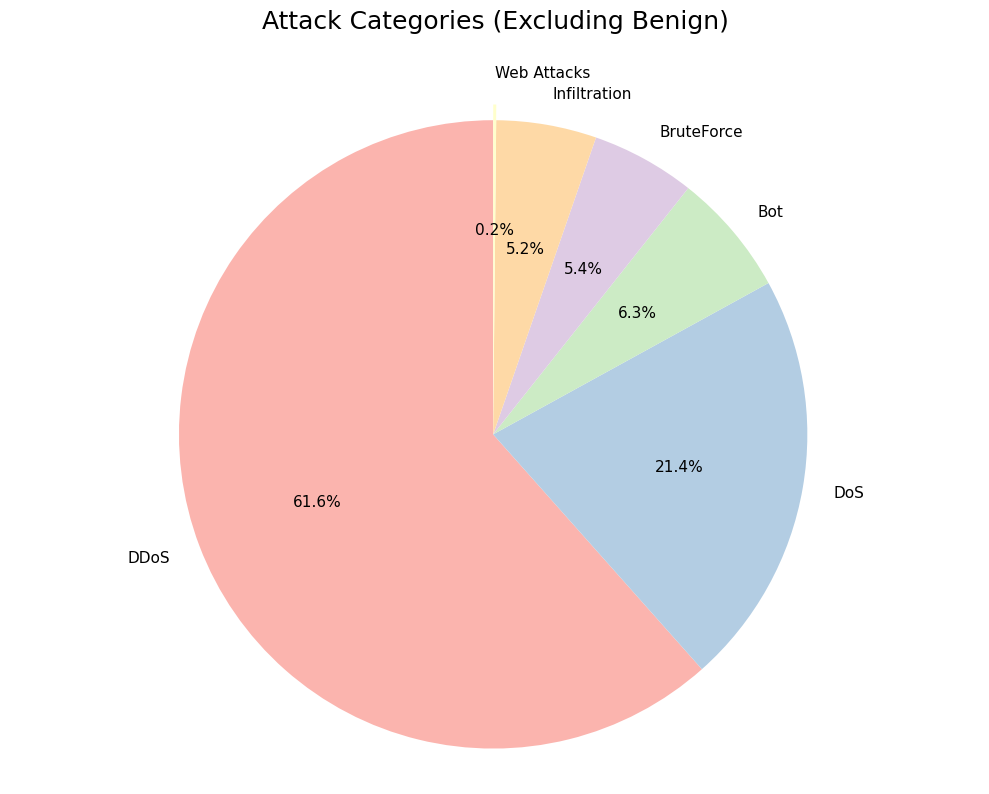

In [ ]:
df_attacks_only = df[df['Attack_Category'] != 'Benign']

attack_pct = df_attacks_only['Attack_Category'].value_counts(normalize=True) * 100

labels = attack_pct.index
sizes = attack_pct.values
colors = plt.cm.Pastel1.colors
explode = [0.05 if s < 5 else 0 for s in sizes]

plt.figure(figsize=(10, 8))
patches, texts, autotexts = plt.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',
    startangle=90,
    explode=explode,
    colors=colors,
    textprops={'fontsize': 11}
)

plt.title('Attack Categories (Excluding Benign)', fontsize=18, y=1.05)
for autotext in autotexts:
    autotext.set_color('black')
    autotext.set_fontsize(11)

plt.axis('equal')
plt.tight_layout()
plt.show()


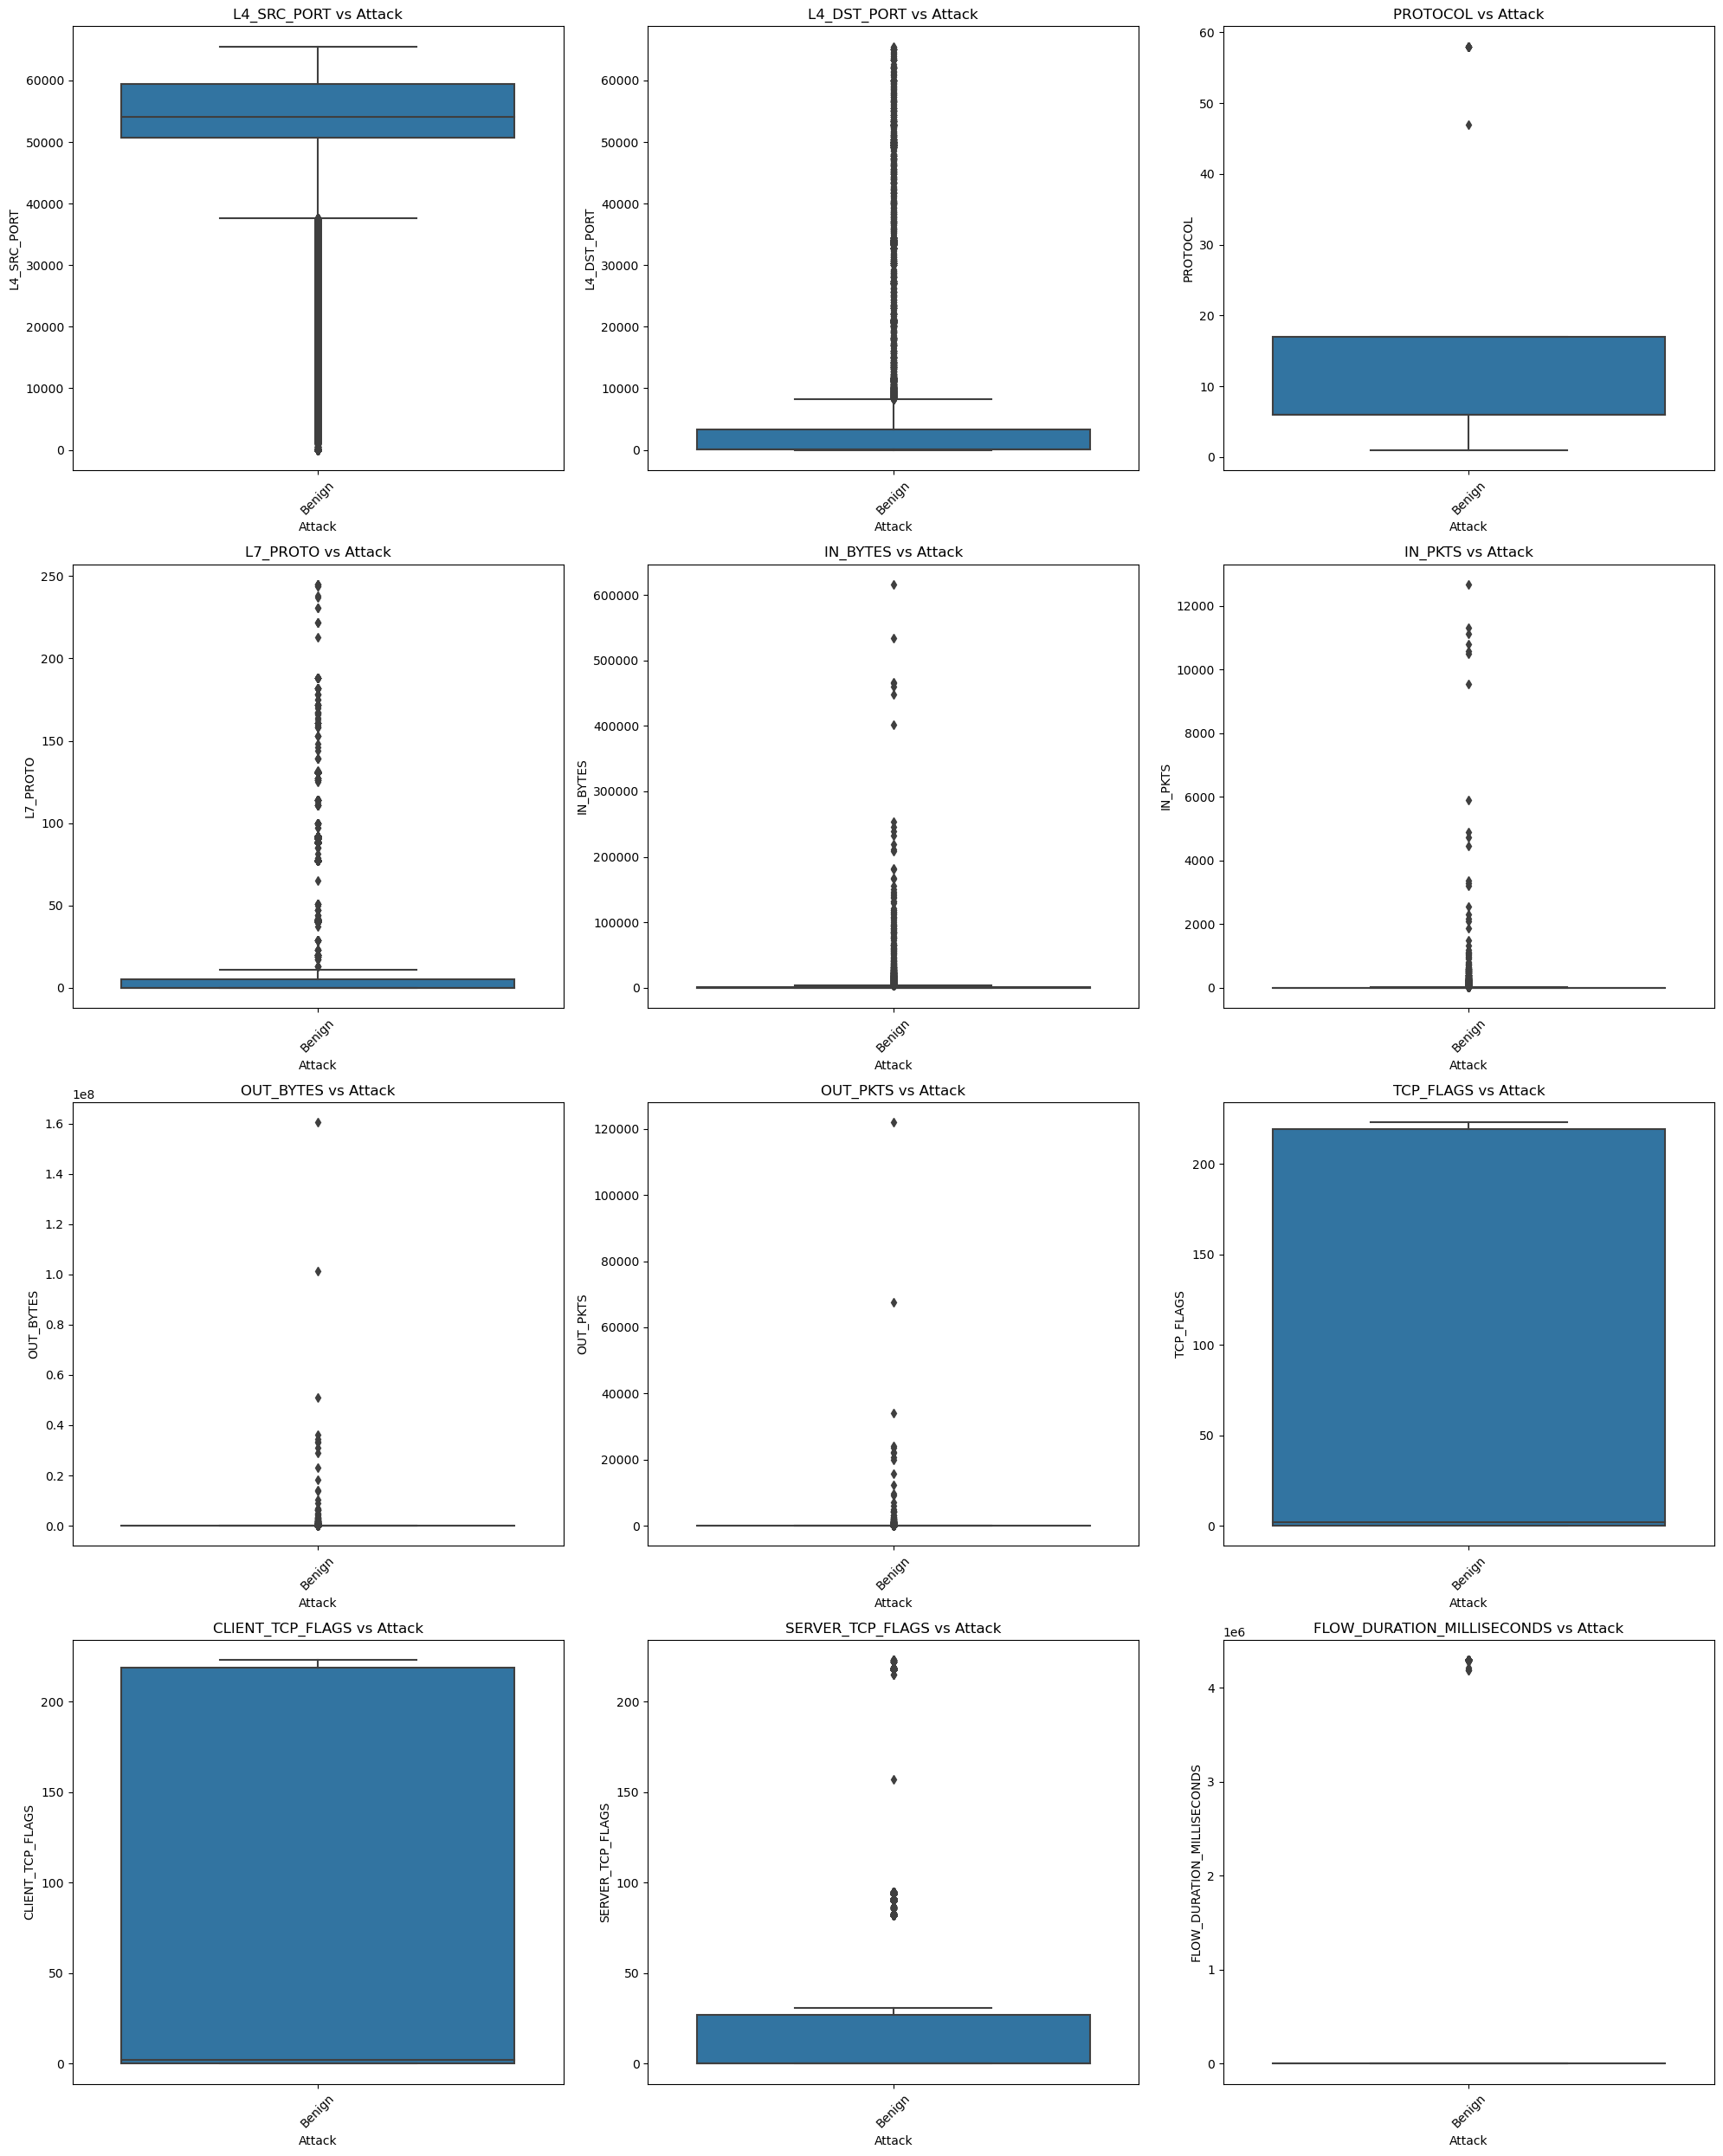

In [ ]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

plt.figure(figsize=(20, 25))
for i, col in enumerate(numerical_cols[:12]):
    plt.subplot(4, 3, i+1)
    sns.boxplot(x='Attack', y=col, data=df[df['Attack'].isin(['Benign', 'Attack'])])
    plt.title(f'{col} vs Attack')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


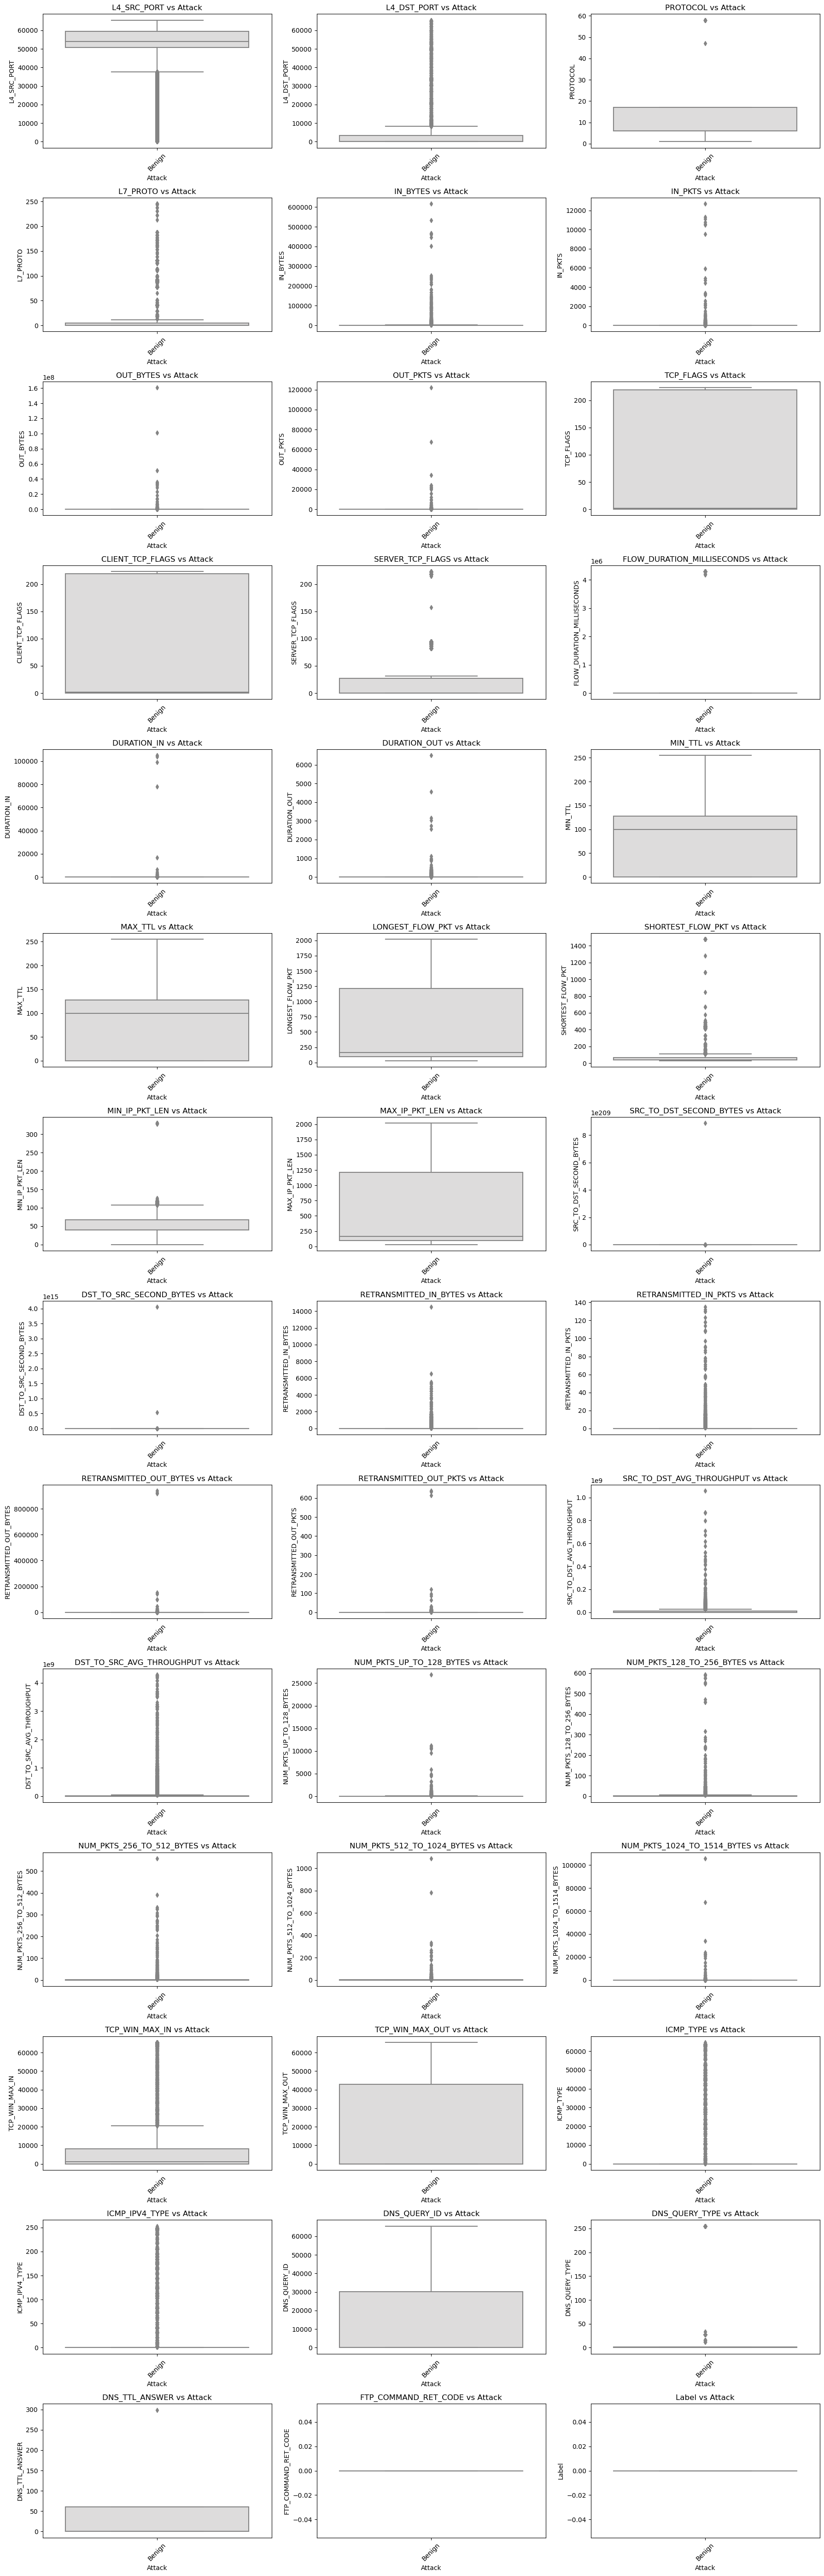

In [ ]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

n_cols = 3
n_rows = int(np.ceil(len(numerical_cols) / n_cols))

plt.figure(figsize=(n_cols * 6, n_rows * 4))

for i, col in enumerate(numerical_cols):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.boxplot(x='Attack', y=col, data=df[df['Attack'].isin(['Benign', 'Attack'])], palette='coolwarm')
    plt.title(f'{col} vs Attack')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


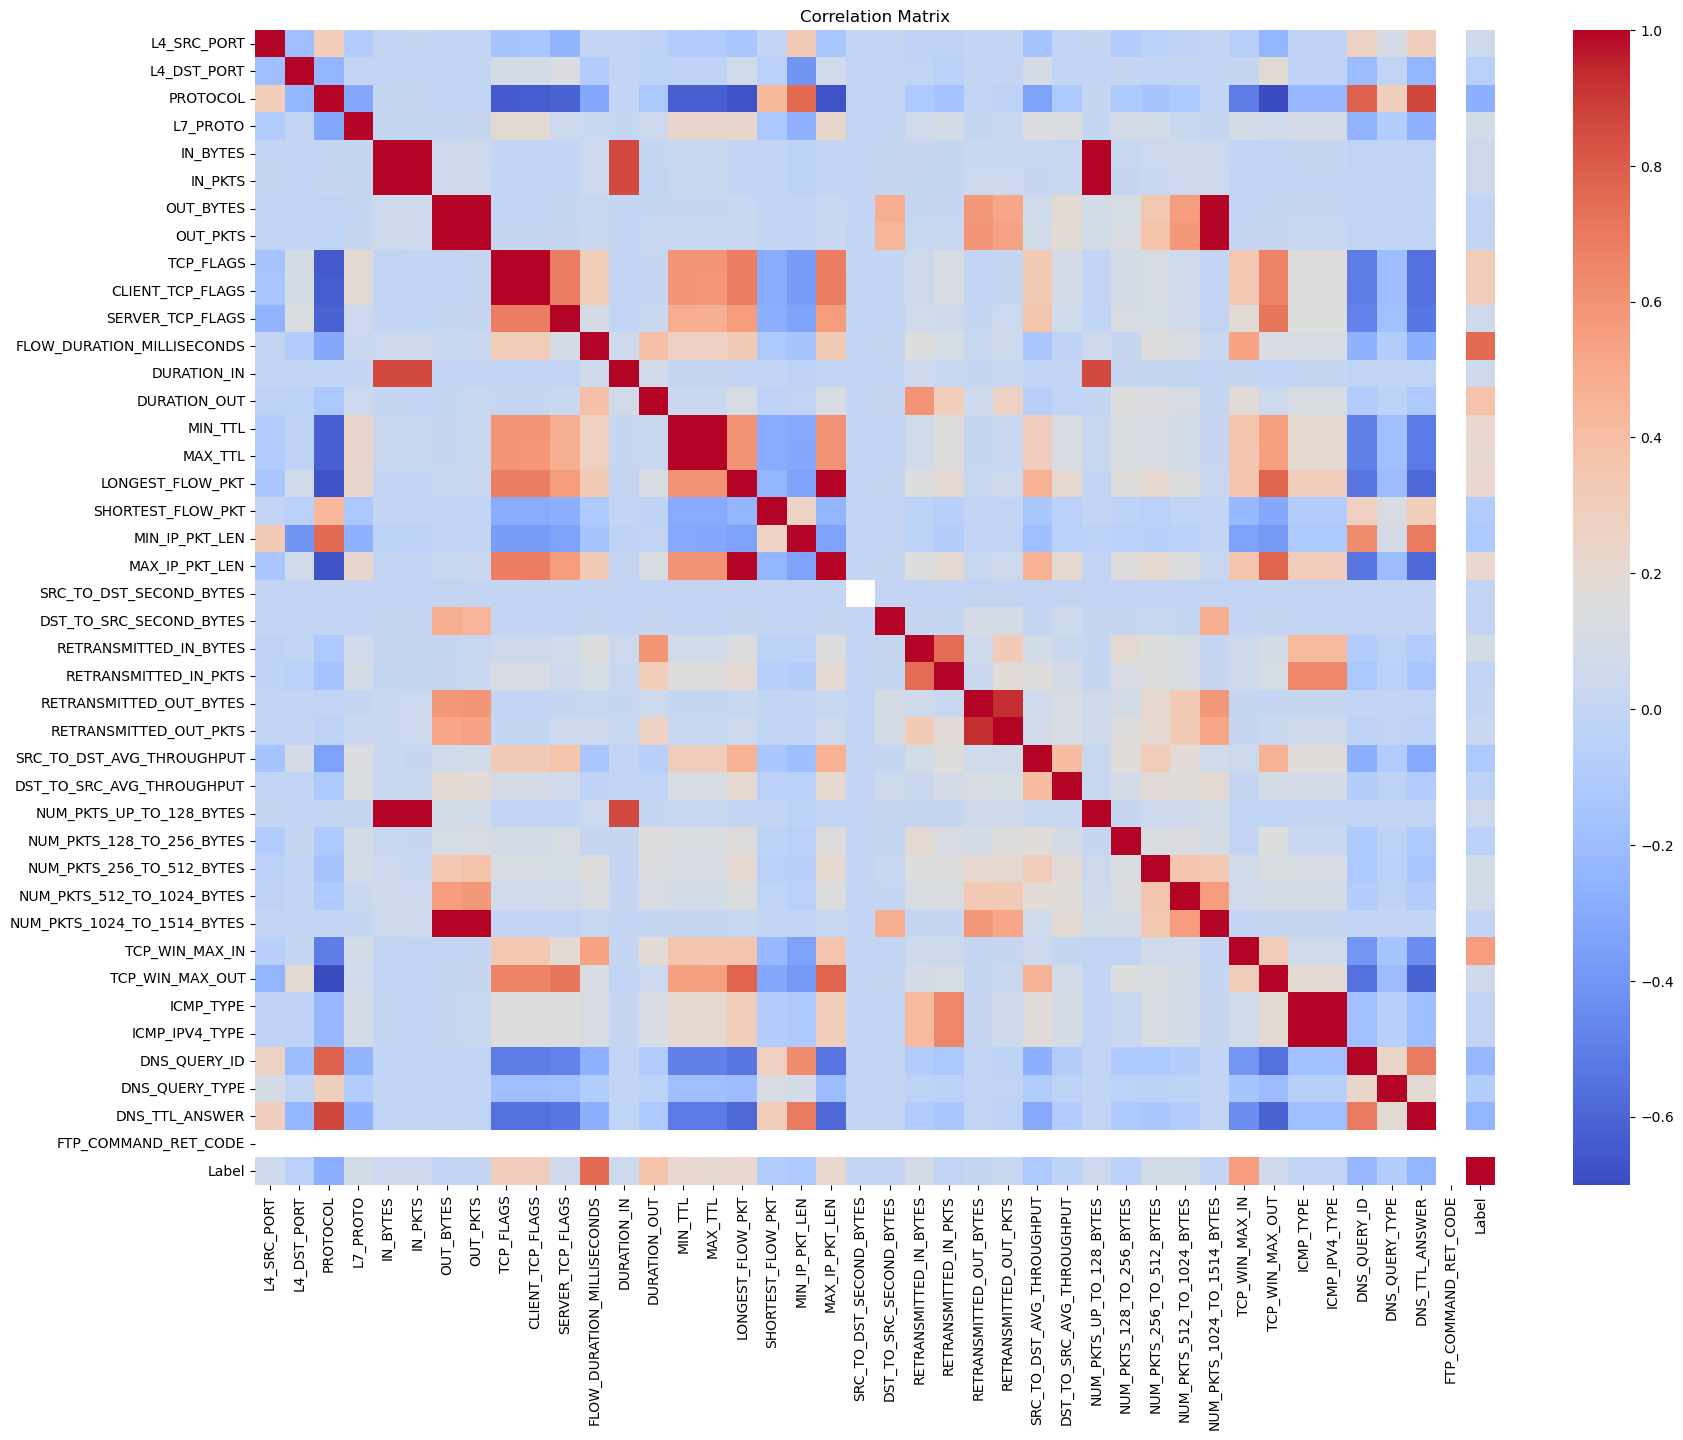

In [ ]:
plt.figure(figsize=(20,15))
corr = df[numerical_cols].corr()
sns.heatmap(corr, cmap='coolwarm', annot=False)
plt.title("Correlation Matrix")
plt.show()

In [ ]:
print(df['L4_DST_PORT'].value_counts().head(10))

53      76499
3389    35305
80      29308
443     21166
445     12370
8080     1539
23       1453
22       1355
5355      967
21        413
Name: L4_DST_PORT, dtype: int64


### 53 For DNS
### 3389 RDP (Remate Desktop)
### 80 HTTP
### 443 HTTPs
### 445 SMP
### 8080 HTTP Proxy
### 23 Telnet
### 22 SSH
### 21 FTP

In [ ]:
print(df['PROTOCOL'].value_counts())

6     110182
17     78531
1        197
58        14
2         13
47         1
Name: PROTOCOL, dtype: int64


### 6 For TCP
### 17 For UDB
### 1 For ICMP
### 58 For ICMP V6

### The most duplicate source IPs in attacks

In [ ]:
top_attack_ips = df['IPV4_SRC_ADDR'].value_counts().head(10)
print(top_attack_ips)


18.219.193.20     4356
52.14.136.135     1440
18.218.229.235    1432
18.216.200.189    1429
18.216.24.42      1402
18.219.5.43       1382
18.218.115.60     1377
18.219.32.43      1376
18.218.11.51      1368
18.219.9.1        1366
Name: IPV4_SRC_ADDR, dtype: int64


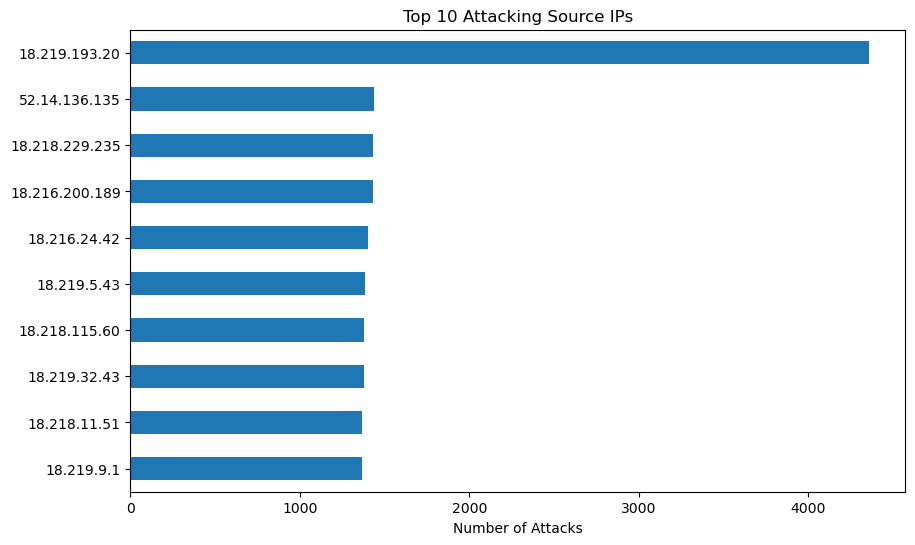

In [ ]:
top_attack_ips.plot(kind='barh', figsize=(10,6), title='Top 10 Attacking Source IPs')
plt.xlabel('Number of Attacks')
plt.gca().invert_yaxis()
plt.show()


 ### Does the same IP perform different types of attacks?

In [ ]:
attack_data = df[df['Attack'] != 'Benign'][['IPV4_SRC_ADDR', 'Attack']]

ip_attack_types = attack_data.groupby('IPV4_SRC_ADDR')['Attack'].nunique().sort_values(ascending=False)

print(ip_attack_types[ip_attack_types > 1].head(10))


IPV4_SRC_ADDR
18.218.115.60     6
18.219.32.43      3
18.219.5.43       3
18.216.200.189    3
52.14.136.135     3
18.219.9.1        3
18.218.11.51      3
18.218.55.126     3
18.218.229.235    2
18.216.24.42      2
Name: Attack, dtype: int64


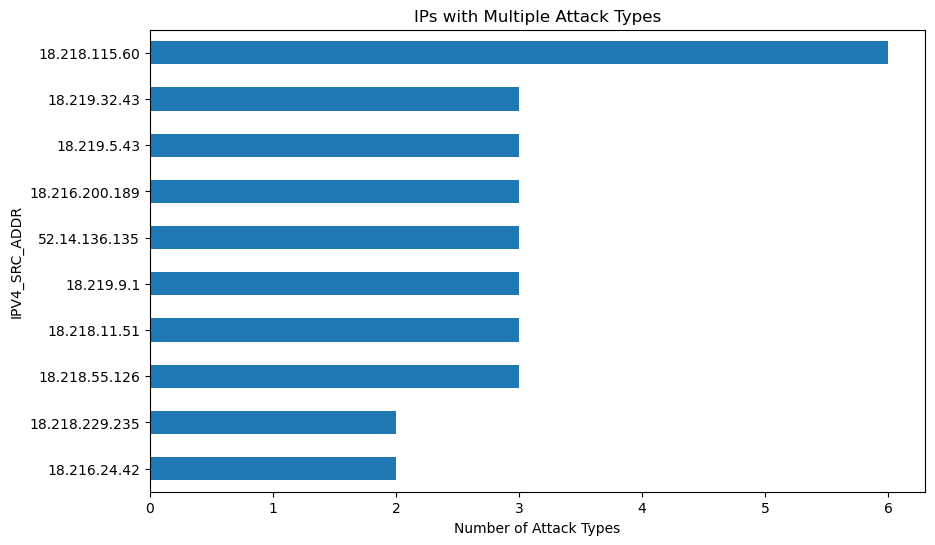

In [ ]:
ip_attack_types[ip_attack_types > 1].head(10).plot(kind='barh', figsize=(10,6), title='IPs with Multiple Attack Types')
plt.xlabel('Number of Attack Types')
plt.gca().invert_yaxis()
plt.show()

### The most duplicate destination IPs in attacks

In [ ]:
top_attack_des_ips = df['IPV4_DST_ADDR'].value_counts().head(10)
print(top_attack_des_ips)

172.31.0.2         76456
172.31.69.28       10896
172.31.69.25        9159
169.254.169.254     4618
18.219.211.138      1431
72.21.91.29          840
178.255.83.1         639
172.31.64.83         566
0.0.0.0              535
224.0.0.252          457
Name: IPV4_DST_ADDR, dtype: int64


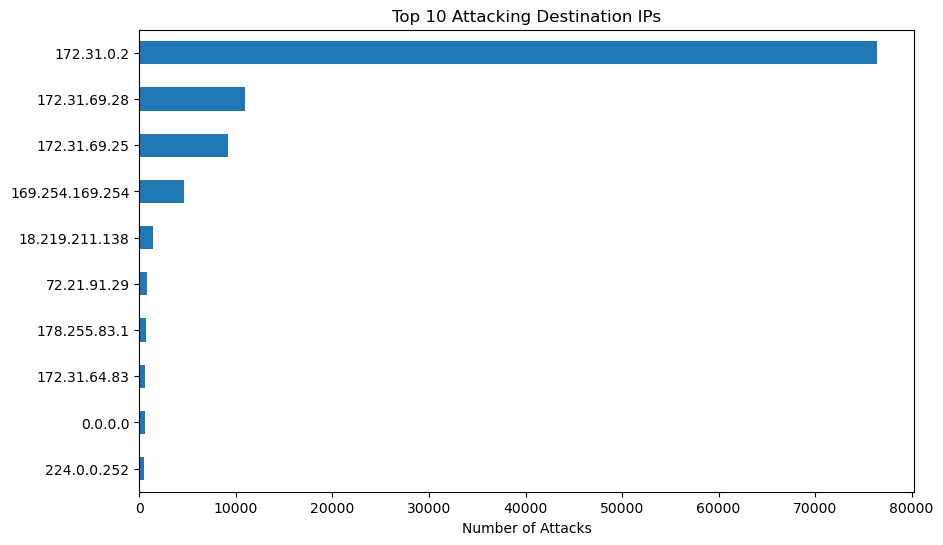

In [ ]:
top_attack_des_ips.plot(kind='barh', figsize=(10,6), title='Top 10 Attacking Destination IPs')
plt.xlabel('Number of Attacks')
plt.gca().invert_yaxis()
plt.show()


# IN_BYTES	 IN_PKTS   OUT_BYTES	  OUT_PKTS

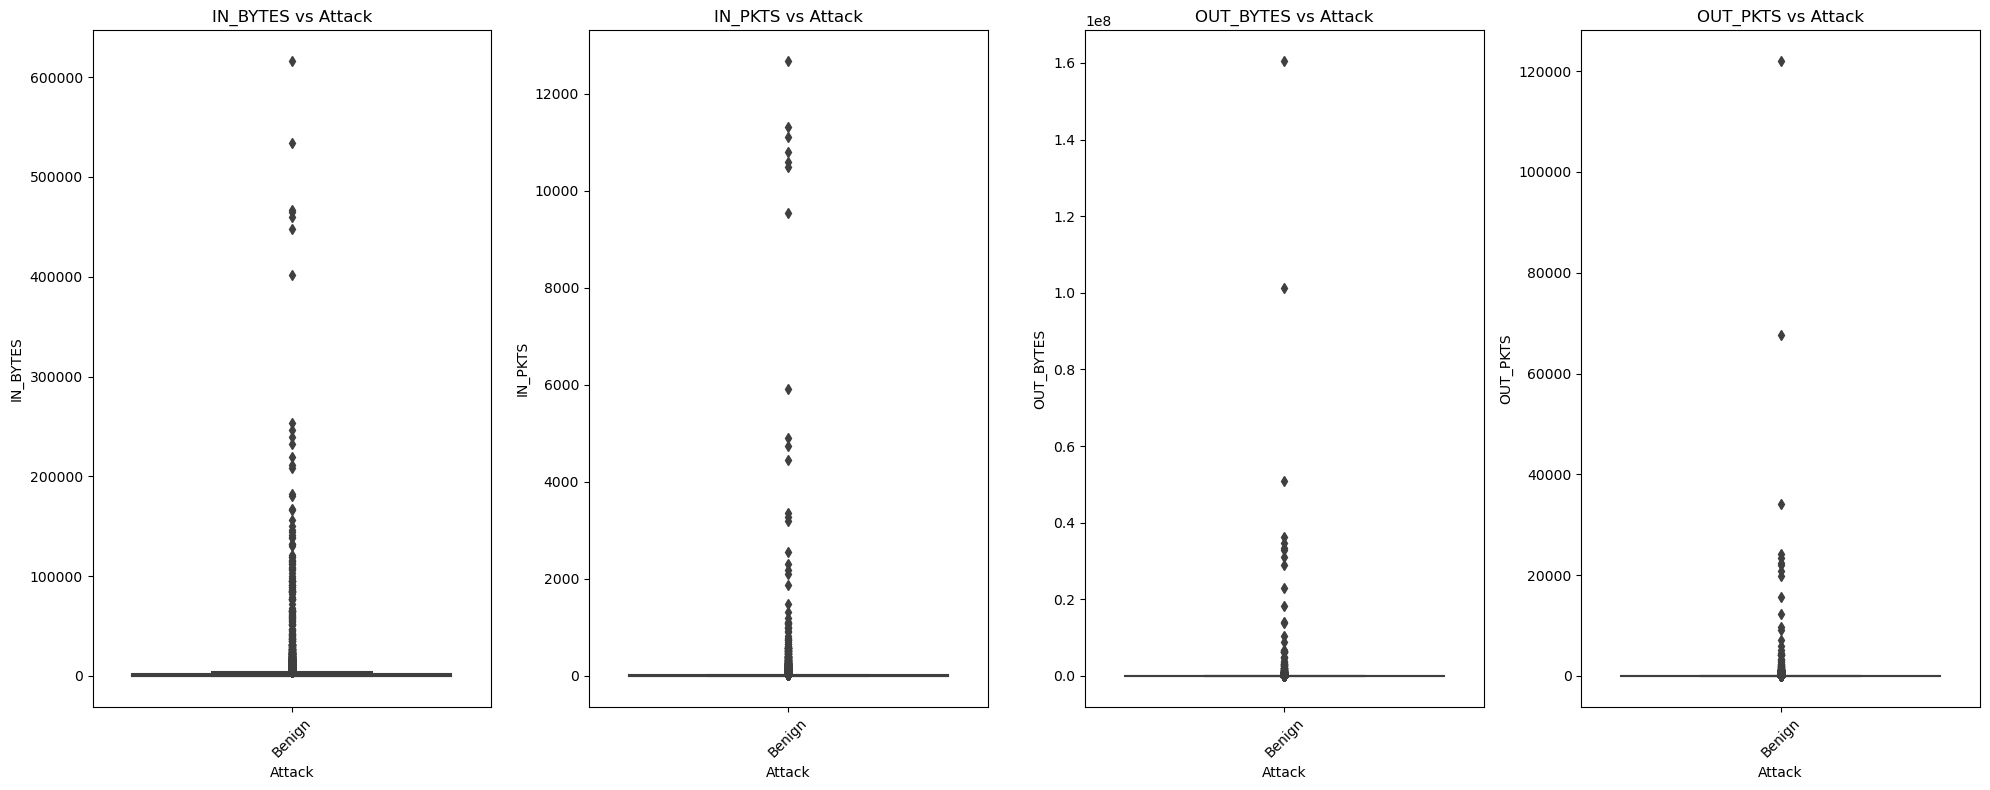

In [ ]:
features = ['IN_BYTES', 'IN_PKTS', 'OUT_BYTES', 'OUT_PKTS']
plt.figure(figsize=(20, 8))

for i, col in enumerate(features):
    plt.subplot(1, 4, i+1)
    sns.boxplot(x='Attack', y=col, data=df[df['Attack'].isin(['Benign', 'Attack'])])
    plt.title(f'{col} vs Attack')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


### Analyze the relationship between the number of packets and the size of the data

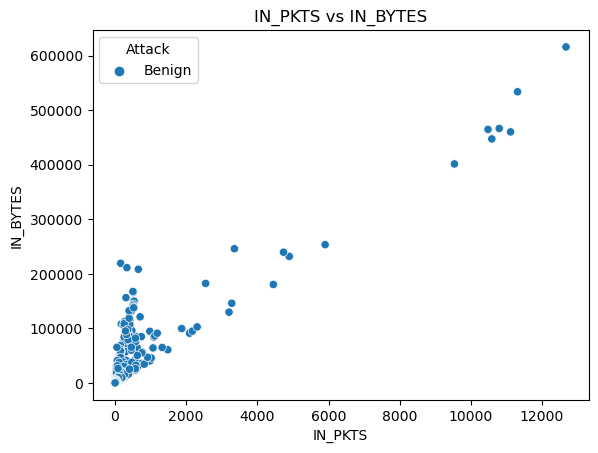

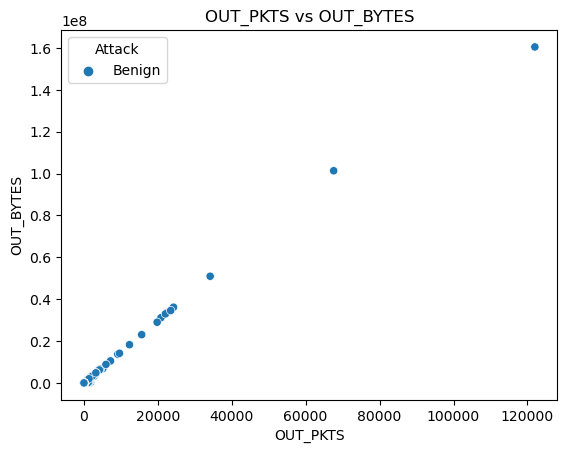

In [ ]:
sns.scatterplot(x='IN_PKTS', y='IN_BYTES', hue='Attack', data=df[df['Attack'].isin(['Benign', 'Attack'])])
plt.title('IN_PKTS vs IN_BYTES')
plt.show()

sns.scatterplot(x='OUT_PKTS', y='OUT_BYTES', hue='Attack', data=df[df['Attack'].isin(['Benign', 'Attack'])])
plt.title('OUT_PKTS vs OUT_BYTES')
plt.show()


### TCP_FLAGS	CLIENT_TCP_FLAGS	SERVER_TCP_FLAGS


### Top used flages

In [ ]:
cols = ['TCP_FLAGS', 'CLIENT_TCP_FLAGS', 'SERVER_TCP_FLAGS']
for col in cols:
    print(f"\nTop values in {col}:")
    print(df[col].value_counts().head(10))



Top values in TCP_FLAGS:
0      78757
219    24098
223    17427
30     17264
222    16209
27     13096
2       8958
23      4925
31      4425
22      1254
Name: TCP_FLAGS, dtype: int64

Top values in CLIENT_TCP_FLAGS:
0      78757
219    33497
222    18459
27     14790
30     11504
2       9783
26      6147
19      5067
223     5000
31      2353
Name: CLIENT_TCP_FLAGS, dtype: int64

Top values in SERVER_TCP_FLAGS:
0     88332
27    42954
26    17649
30    11412
90     9013
94     6429
22     5315
91     2548
31     1549
20     1169
Name: SERVER_TCP_FLAGS, dtype: int64


### The values you see (such as 219 or 223) are the sum of the flags that were raised together.
Example:
219 = 128 (CWR) + 64 (ECE) + 16 (ACK) + 8 (PSH) + 2 (SYN) + 1 (FIN)
![image.png](attachment:image.png)

### Values such as 219, 223, and 222 may be related to attacks because they have many flags raised together, which is abnormal in a normal connection.

# SERVER_TCP_FLAGS
### 0: Normal, the server is not always Bird Flags.

### 27, 26, 30: Average values often include ACK + PSH + FIN or RST →.This may be a reaction to abnormal behavior on the part of the customer.

### 90, 94, 91: These values are less common, but distinct - they may be responses to offensive communications.

### The server responds with abnormal connections that contain RST or FIN+ACK, which indicates a sudden termination or an attempt to repel an attack.

In [ ]:
# See Flags marked for attacks only
for col in cols:
    attack_flags = set(df[df['Attack'] != 'Benign'][col].unique())
    benign_flags = set(df[df['Attack'] == 'Benign'][col].unique())

    only_in_attack = attack_flags - benign_flags

    print(f"\nFlags in {col} that appear **only** in attacks:")
    print(only_in_attack if only_in_attack else "None")



Flags in TCP_FLAGS that appear **only** in attacks:
{41, 61}

Flags in CLIENT_TCP_FLAGS that appear **only** in attacks:
{41}

Flags in SERVER_TCP_FLAGS that appear **only** in attacks:
None


### Values 41 and 61 only appeared in attacks and are therefore considered signs for specific attacks - they can be used as features in classification algorithms.

# Adding New Feature

In [ ]:
df['Rare_TCP_FLAG'] = df['TCP_FLAGS'].isin([41, 61]).astype(int)
df['Rare_CLIENT_FLAG'] = df['CLIENT_TCP_FLAGS'].isin([41]).astype(int)


### We can use them as very important features for classification or early warning in the SIEM system.

![image.png](attachment:image.png)